In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

from utils import get_all_night_nodes_and_times
from plot_utils import plot_nodes_vs_time

from utils import *
from parameters import *

## Waterport visits and reward consumption

In [2]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')
n_bouts = len(tf.no)
waterport_visits = [sum(tf.no[bout][:,0]==RWD_NODE) for bout in range(n_bouts)]
rwd_deliveries = [len(tf.re[bout]) for bout in range(n_bouts)]

Text(0, 0.5, 'Count')

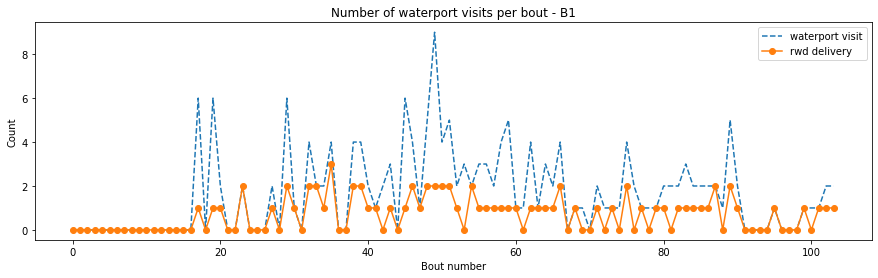

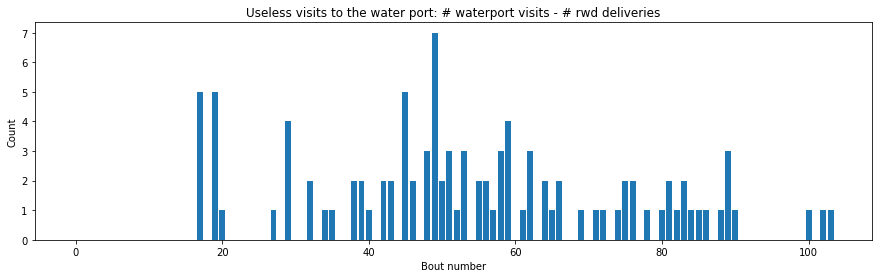

In [3]:
figure(figsize=(15,4))
width = .35
plt.plot(arange(n_bouts), waterport_visits, '--', label='waterport visit')
plt.plot(arange(n_bouts), rwd_deliveries, '-o', label='rwd delivery')
xlabel('Bout number')
ylabel('Count')
# xlim(0,100)
title('Number of waterport visits per bout - %s' % nickname)
legend()

useless_visits = array(waterport_visits)-(rwd_deliveries)
figure(figsize=(15,4))
title('Useless visits to the water port: # waterport visits - # rwd deliveries')
bar(arange(n_bouts), useless_visits)
xlabel('Bout number')
ylabel('Count')

(-0.5, 4.0)

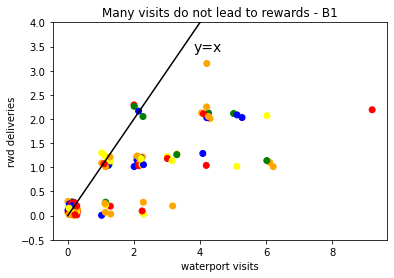

In [8]:
colors = ['red', 'green', 'blue', 'orange', 'yellow']
n_bouts = len(waterport_visits)
cs = random.choice(colors, n_bouts)
# cs = ['red', 'green', 'blue', 'orange', 'yellow']*34+['red', 'green', 'blue']

noise_lvl = .3
figure()
title("Many visits do not lead to rewards - %s" % nickname)
scatter(array(waterport_visits)+random.rand(n_bouts)*noise_lvl, array(rwd_deliveries)+random.rand(n_bouts)*noise_lvl, color=cs)
plt.plot(arange(10), arange(10), 'k')
xlabel('waterport visits')
ylabel('rwd deliveries')
text(3.8,3.4,"y=x", fontsize=14)
ylim(-.5, 4)

# figure()
# scatter(array(waterport_visits), array(rwd_deliveries), color=cs)
# plt.plot(arange(10), arange(10), 'k')
# xlabel('waterport visits')
# ylabel('rwd deliveries')

# Waterport visit intervals

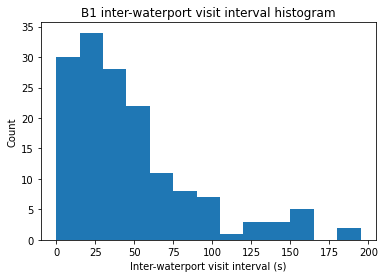

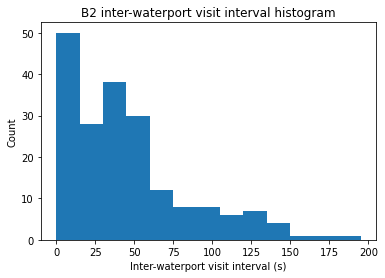

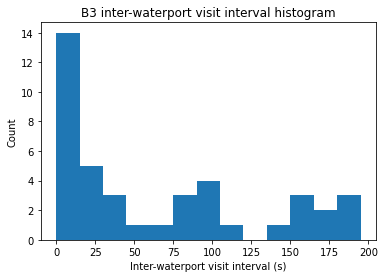

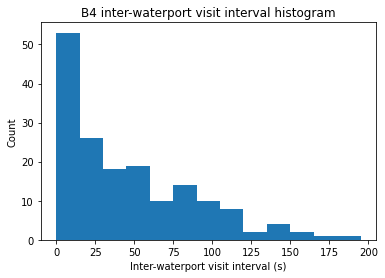

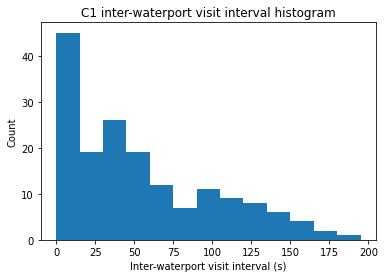

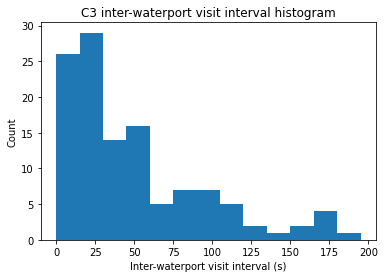

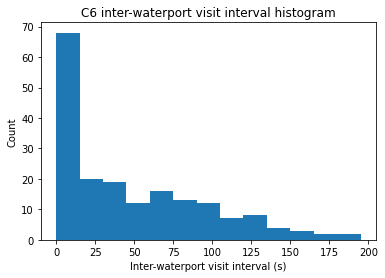

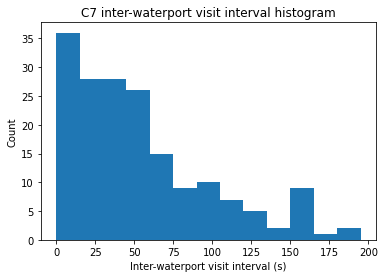

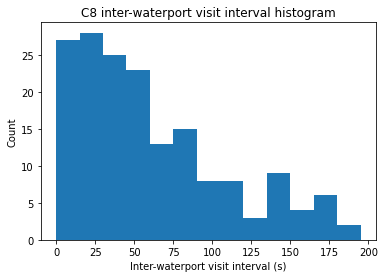

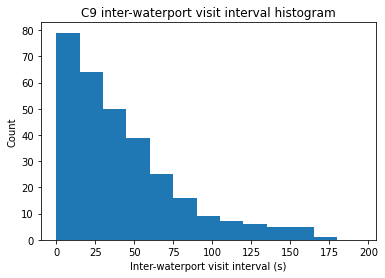

In [12]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    
    # get waterport visits frames
    frs_to_waterport_visits = []
    for bout in range(n_bouts):
        rwd_node_visits_frs = tf.no[bout][tf.no[bout][:,0]==rwd_node]
        if len(rwd_node_visits_frs)>0:
            bout_init_fr = tf.fr[bout,0]
            frs_to_waterport_visits.append(bout_init_fr + rwd_node_visits_frs[:,1])

    frs_to_waterport_visits = np.concatenate(frs_to_waterport_visits)

    mazetimes_to_waterport_visits = np.array([TimeInMaze(frame_to_waterport_visit,tf) 
                                             for frame_to_waterport_visit in frs_to_waterport_visits])
    times_to_waterport_visits = np.array([frame_to_waterport_visit / FRAME_RATE
                                             for frame_to_waterport_visit in frs_to_waterport_visits])
    
    plt.figure()
    plt.hist(times_to_waterport_visits[1:]-times_to_waterport_visits[:-1], bins=arange(0,200, 15))
    plt.title("%s inter-waterport visit interval histogram" % nickname)
    plt.xlabel('Inter-waterport visit interval (s)')
    plt.ylabel('Count')
#     ylim(0,100)
#     plt.figure()
#     plt.hist(mazetimes_to_waterport_visits[1:]-mazetimes_to_waterport_visits[:-1], bins=arange(0,200, 15), color='g')
#     plt.title("%s inter-waterport visit mazetime interval histogram" % nickname)
#     plt.xlabel('Inter-waterport visit interval (s)')
#     plt.ylabel('Count')
# #     ylim(0,100)

# Reward delivery intervals

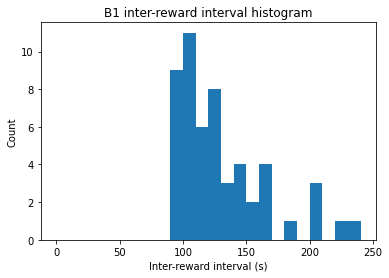

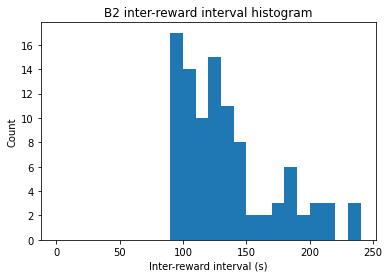

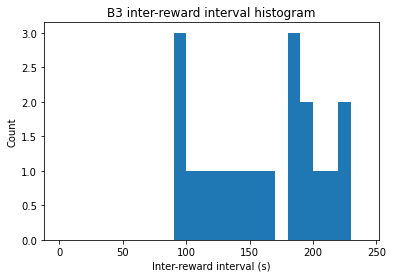

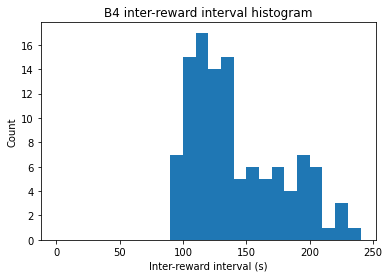

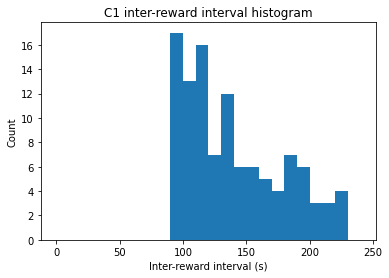

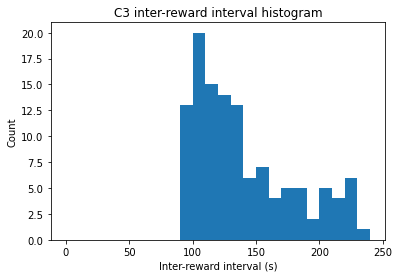

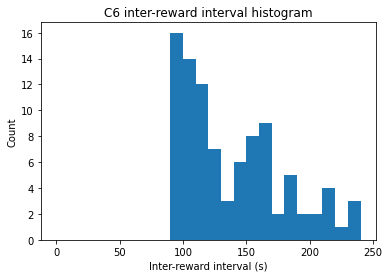

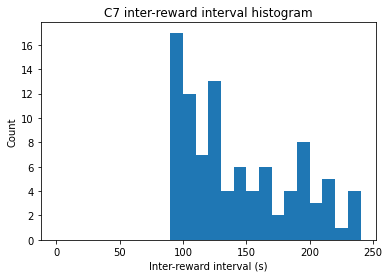

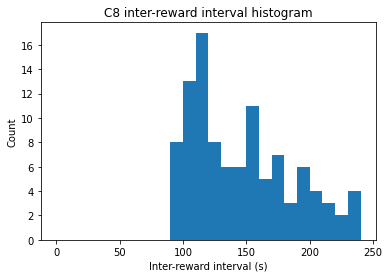

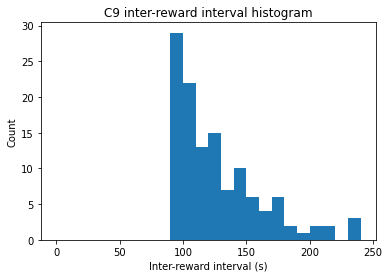

In [13]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    # get all reward deliveries from all bouts
    frames_to_rwd = np.array([s_e_frs_of_each_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) 
                                                                                        for s_e_frs_of_each_rwd in frs_rwd])
#     mazetimes_to_rwd = np.array([TimeInMaze(frame_to_rwd,tf) for frame_to_rwd in frames_to_rwd])
    times_to_rwd = np.array([frame_to_rwd/FRAME_RATE for frame_to_rwd in frames_to_rwd])
    plt.figure()
#     plt.hist(mazetimes_to_rwd[1:]-mazetimes_to_rwd[:-1], bins=arange(0,200, 15))
    plt.hist(times_to_rwd[1:]-times_to_rwd[:-1], bins=arange(0,250, 10))
    plt.title("%s inter-reward interval histogram" % nickname)
    plt.xlabel('Inter-reward interval (s)')
    plt.ylabel('Count')

If plotting histograms for time on maze (`mazetimes_to_rwd`): there are times smaller than 90s. It means that the animal spent time at the home cage instead of at the maze.

## Visualize all night

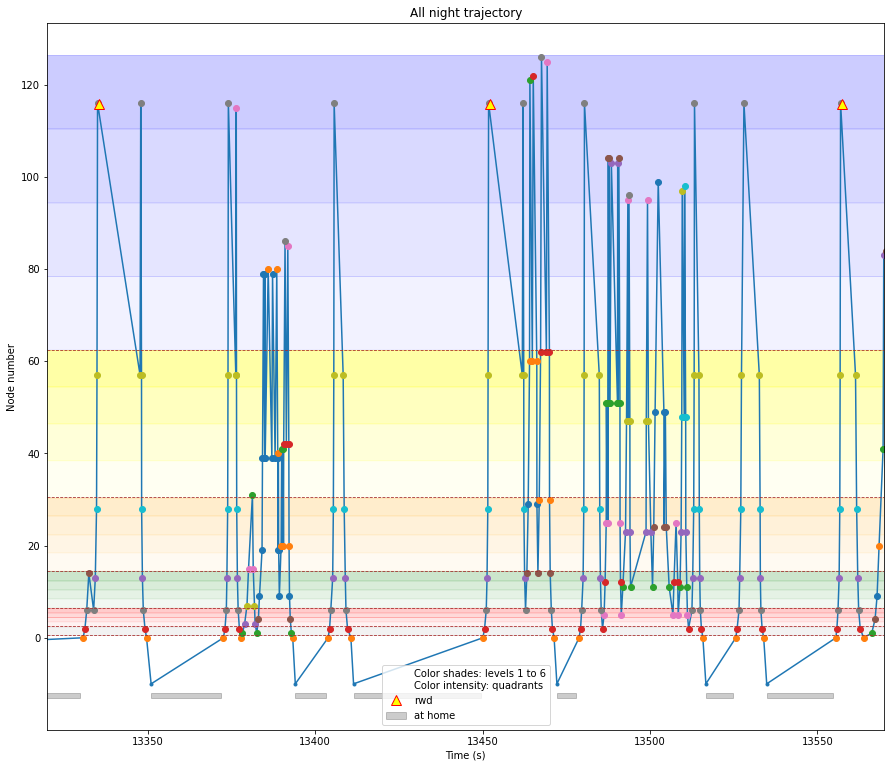

In [20]:
%matplotlib inline
# %matplotlib qt

init_time=13320
time_window=250
nickname = "C3"
tf=LoadTraj(nickname+'-tf')
plot_nodes_vs_time(tf, colored_markers=True, init_time=init_time, time_window=time_window, separate_quadrants=True);

## Plotting rwd deliveries and waterport visits for one animal

(24806.166666666668, 24805.7)

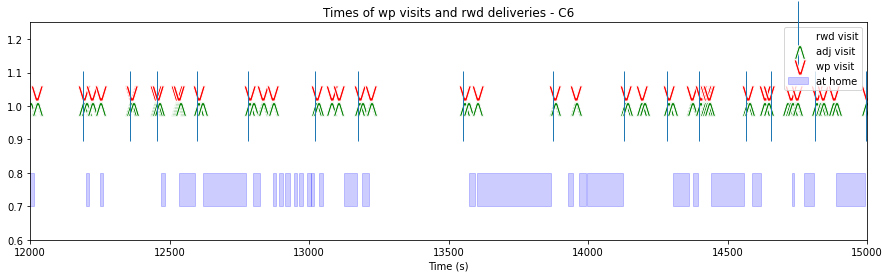

In [10]:
# %matplotlib qt
%matplotlib inline
nickname = "C6"
tf=LoadTraj(nickname+'-tf')

times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)
times_to_adj_node = get_node_visit_times(tf, 57)

init_time=12000
time_window=3000

figure(figsize=(15,4))
plt.plot(times_to_rwd, ones(len(times_to_rwd)), '|', markersize=70, label='rwd visit')
# plt.plot(times_to_waterport_visits, ones(len(times_to_waterport_visits))+.01*(random.rand(len(times_to_waterport_visits))), '.', marker=7, markersize=15, label='wp visit')
# plt.plot(times_to_adj_node, ones(len(times_to_adj_node))-.001*(random.rand(len(times_to_adj_node))), '.', marker=6, markersize=10, label='adj visit')
plt.scatter(times_to_adj_node, ones(len(times_to_adj_node))-.01, marker=r'$\wedge$', s=200, label='adj visit', color='green', edgecolors='white', linewidths=1)
plt.scatter(times_to_waterport_visits, ones(len(times_to_waterport_visits))+.04, marker=r'$\vee$', s=250, label='wp visit', color='red', edgecolors='white', linewidths=1)
# marker=r'$\wedge$'

# plot times at home
START_IDX=0
END_IDX=1
for bout in range(len(tf.no)-1):
#     plt.plot([tf.fr[bout][end_i]/FRAME_RATE, tf.fr[bout+1][start_i]/FRAME_RATE], [.7,.7], '-b|', label='at home' if bout==0 else None)
    plt.fill_betweenx([.7, .8], tf.fr[bout][END_IDX]/FRAME_RATE, tf.fr[bout+1][START_IDX]/FRAME_RATE, alpha=.2, color='blue', label='at home' if bout==0 else None)

plt.xlim(init_time, init_time+time_window)
plt.ylim(0.6, 1.25)
plt.title("Times of wp visits and rwd deliveries - %s" % nickname)
plt.xlabel("Time (s)")
legend()
times_to_rwd[-1], times_to_waterport_visits[-1]

## For all animals

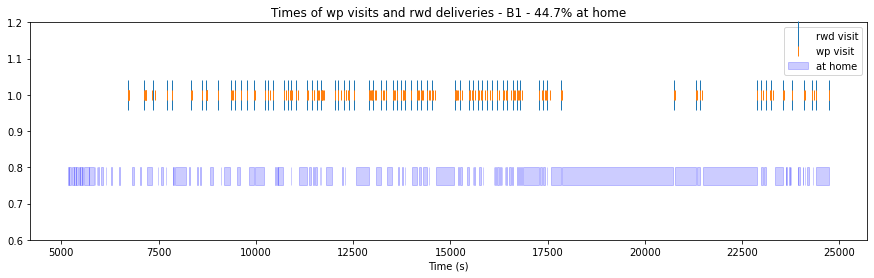

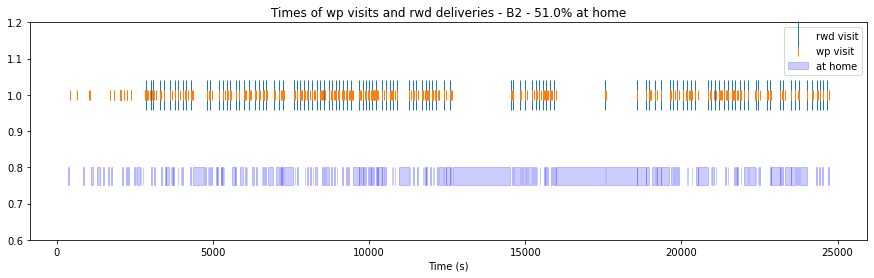

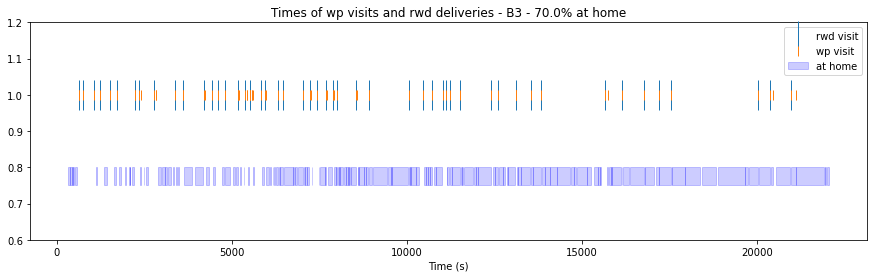

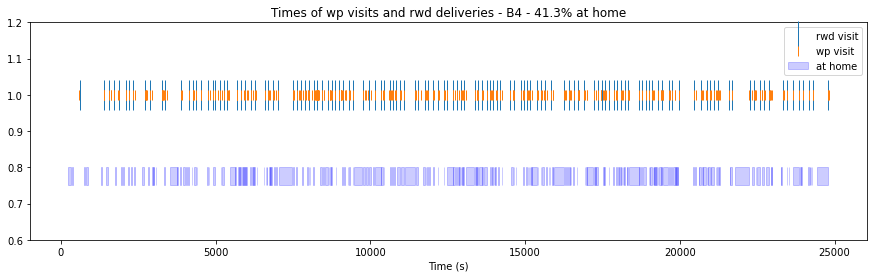

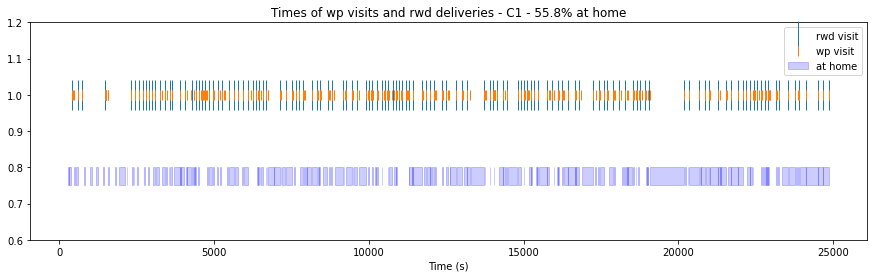

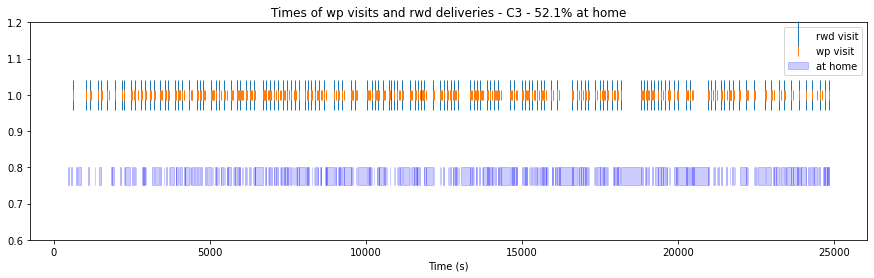

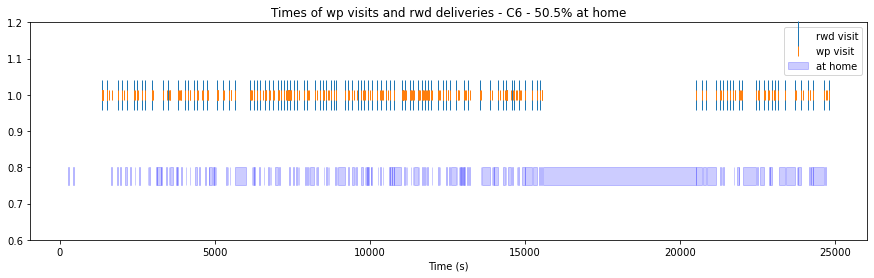

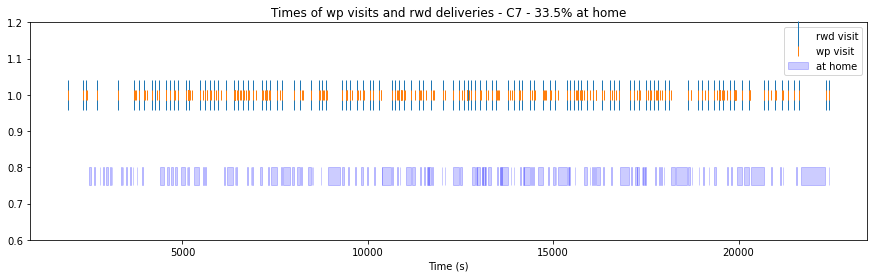

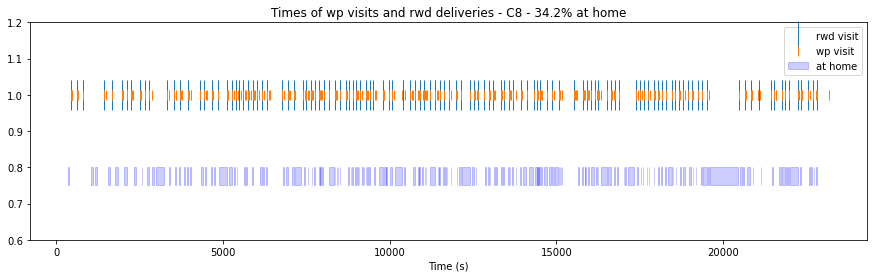

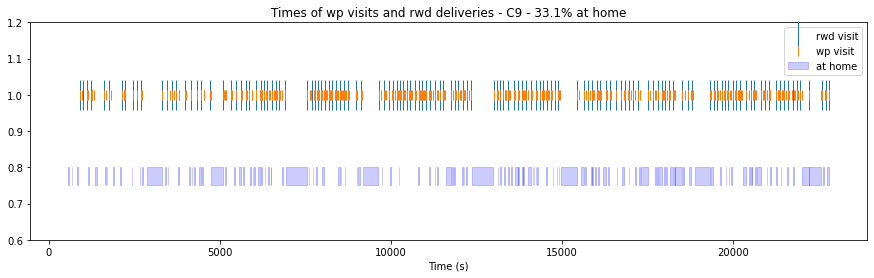

In [70]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
#     nickname = "B2"
#     tf=LoadTraj(nickname+'-tf')

    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)

    init_time=0
    time_window=None

    figure(figsize=(15,4))
    plt.plot(times_to_rwd, ones(len(times_to_rwd)), '|', markersize=30, label='rwd visit')
    plt.plot(times_to_waterport_visits, ones(len(times_to_waterport_visits)), '|', markersize=10, label='wp visit')
#     xlim(init_time, init_time+time_window)
    
    time_at_home=list()
    for bout in range(len(tf.no)-1):
        plt.fill_betweenx([.75, .8], tf.fr[bout][end_i]/FRAME_RATE, tf.fr[bout+1][start_i]/FRAME_RATE, alpha=.2, color='blue', label='at home' if bout==0 else None)
#         plt.plot([tf.fr[bout][end_i]/FRAME_RATE, tf.fr[bout+1][start_i]/FRAME_RATE], [.7,.7], '-b|', label='at home' if bout==0 else None)
        time_at_home.append(tf.fr[bout+1][start_i]/FRAME_RATE - tf.fr[bout][end_i]/FRAME_RATE)
    
    pct_time_at_home = 100*sum(array(time_at_home))/(tf.fr[-1,-1]/FRAME_RATE)
    
    title("Times of wp visits and rwd deliveries - %s - %.1f%% at home" % (nickname,pct_time_at_home))
    xlabel("Time (s)")
    plt.ylim(.6, 1.2)
    legend()


### sanity check
waterport and reward consumption times

In [93]:
print("first waterport visit before first reward (as it should):")
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
    
    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)

    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    
    print(nickname, times_to_waterport_visits[0]-times_to_rwd[0]<0)
    

print("last waterport visit after last reward:")
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)
    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    
    
    print(nickname, str(times_to_waterport_visits[-1]-times_to_rwd[-1]>=0).ljust(5), "|", 
          "len(times_to_rwd) %3d" % len(times_to_rwd), "len(all_waterport_visits) %3d" % len(all_waterport_visits), 
          "Same?", len(times_to_rwd)==len(all_waterport_visits))
    
    # check that create_list_waterport_visits_in_between_rwds removes the wp visits after last rwd

first waterport visit before first reward (as it should):
B1 True
B2 True
B3 True
B4 True
C1 True
C3 True
C6 True
C7 True
C8 True
C9 True
last waterport visit after last reward:
B1 True  | len(times_to_rwd)  74 len(all_waterport_visits)  74 Same? True
B2 True  | len(times_to_rwd) 115 len(all_waterport_visits) 115 Same? True
B3 True  | len(times_to_rwd)  50 len(all_waterport_visits)  50 Same? True
B4 True  | len(times_to_rwd) 133 len(all_waterport_visits) 133 Same? True
C1 False | len(times_to_rwd) 133 len(all_waterport_visits) 133 Same? True
C3 False | len(times_to_rwd) 143 len(all_waterport_visits) 143 Same? True
C6 False | len(times_to_rwd) 112 len(all_waterport_visits) 112 Same? True
C7 False | len(times_to_rwd) 115 len(all_waterport_visits) 115 Same? True
C8 True  | len(times_to_rwd) 123 len(all_waterport_visits) 123 Same? True
C9 False | len(times_to_rwd) 138 len(all_waterport_visits) 138 Same? True


## First visits after rwd delivery

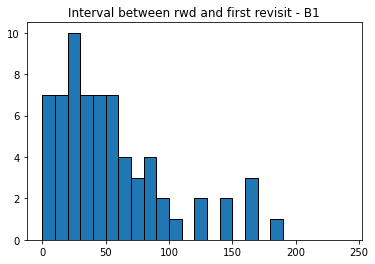

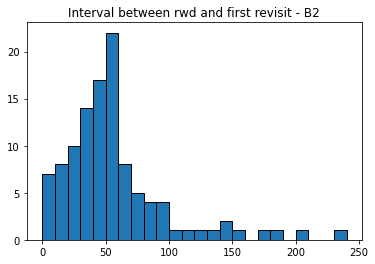

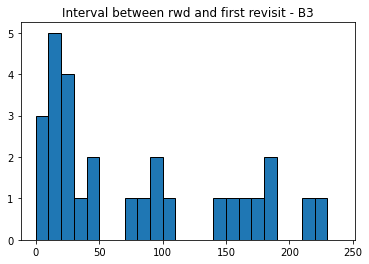

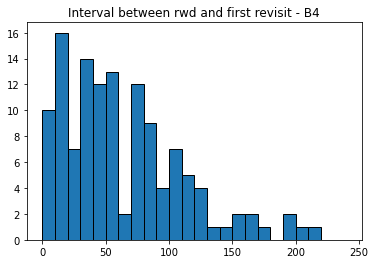

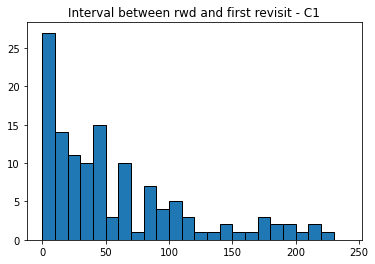

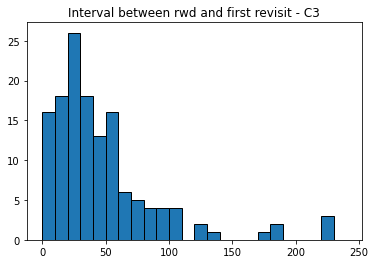

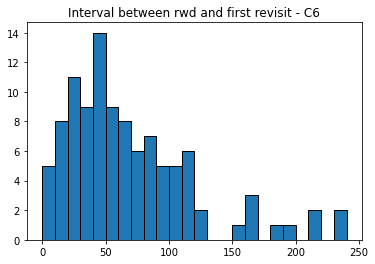

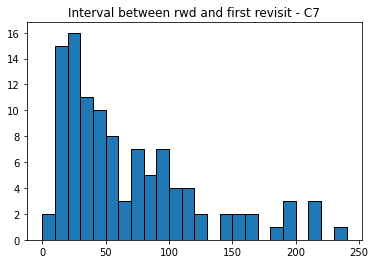

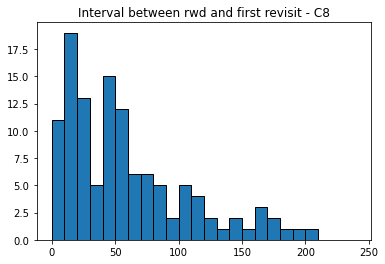

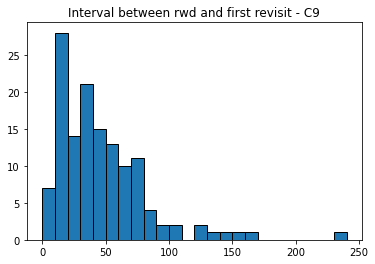

In [39]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
# nickname = "B2"
# tf=LoadTraj(nickname+'-tf')

    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)

    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)

    first_visits_after_rwd = [waterport_visits_in_between_rwds[0] for waterport_visits_in_between_rwds in all_waterport_visits[1:]]  # :1 removes visits before the first reward was received
    n_inter_rwds = len(first_visits_after_rwd)  # used because there is a mismatch between visits

    plt.figure()
    plt.hist(np.array(first_visits_after_rwd) - times_to_rwd[:n_inter_rwds], bins=arange(0,250, 10), ec='black')
    plt.title("Interval between rwd and first revisit - %s" % nickname)

In [41]:
len(all_waterport_visits), len(times_to_rwd), len(first_visits_after_rwd)

(138, 138, 137)

## Amount of wp visits in between rwds

Text(0.5, 0, 'rwd visit number')

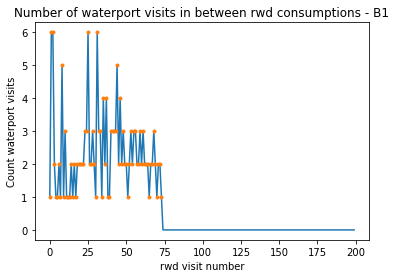

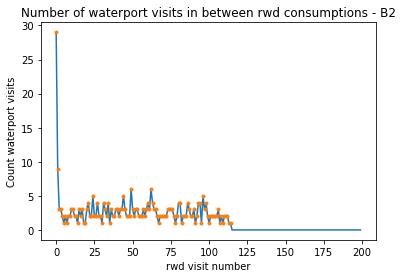

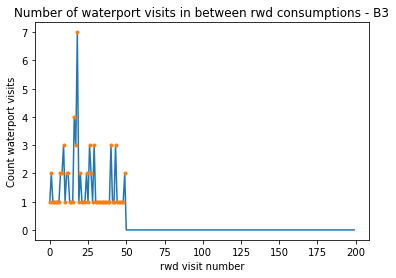

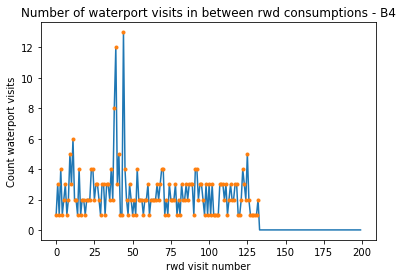

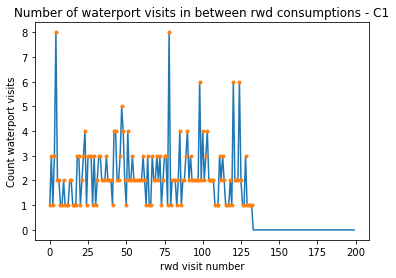

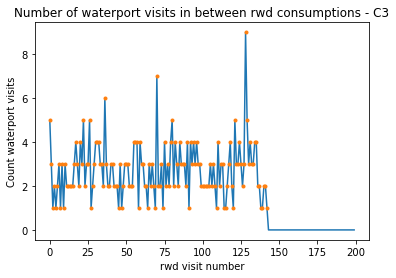

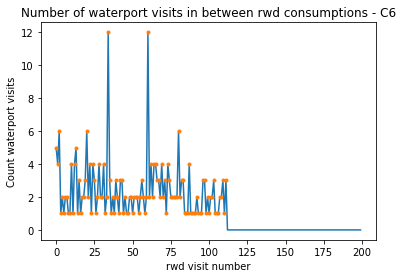

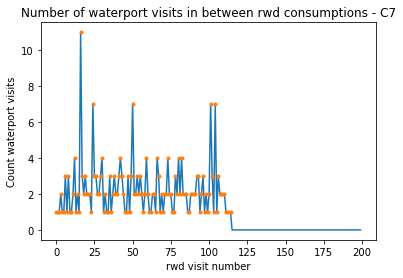

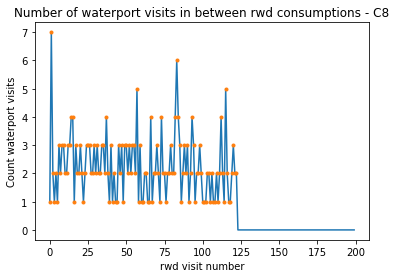

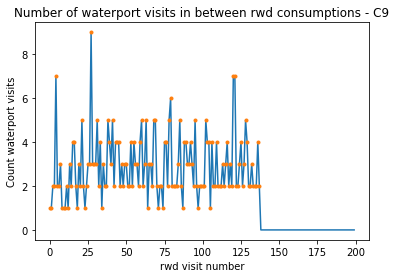

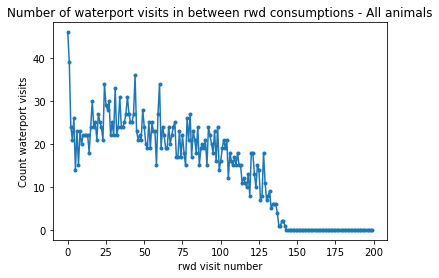

In [33]:
all_animals_count = zeros(200)
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)
    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    plt.figure()
    wp_visit_count_in_bw_rwds = array([len(waterport_visits_in_bw_rwds) 
                                       for waterport_visits_in_bw_rwds in all_waterport_visits])
    all_animals_count += pad(wp_visit_count_in_bw_rwds,(0,200-len(wp_visit_count_in_bw_rwds)), 'constant')
    plt.plot(pad(wp_visit_count_in_bw_rwds,(0,200-len(wp_visit_count_in_bw_rwds)), 'constant'))
    plt.plot(wp_visit_count_in_bw_rwds, '.')
    plt.title("Number of waterport visits in between rwd consumptions - %s" % nickname)
    plt.ylabel("Count waterport visits")
    plt.xlabel("rwd visit number")

figure()
plt.plot(all_animals_count, '.-')
plt.title("Number of waterport visits in between rwd consumptions - All animals")
plt.ylabel("Count waterport visits")
plt.xlabel("rwd visit number")

## Cumulative times to a visit after each reward

Text(0.5, 0, 'Time(s)')

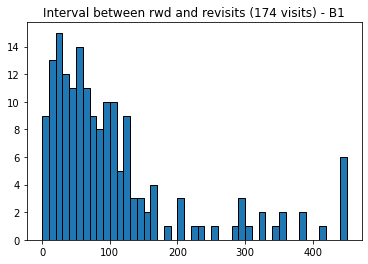

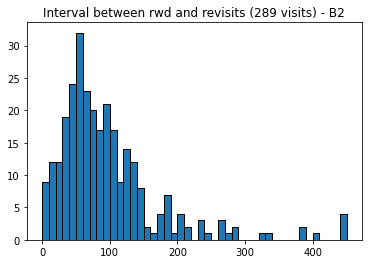

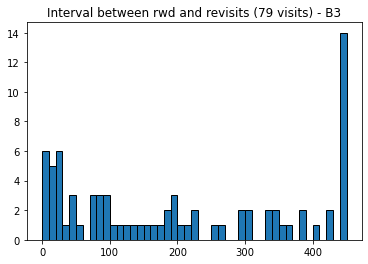

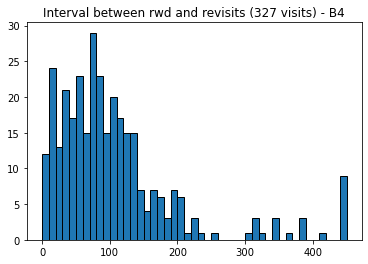

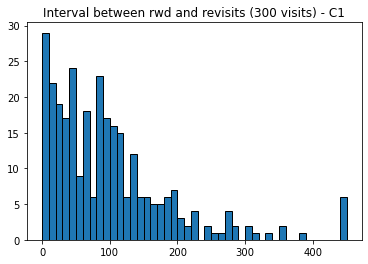

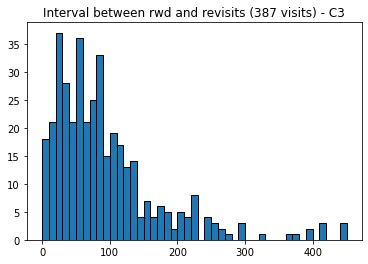

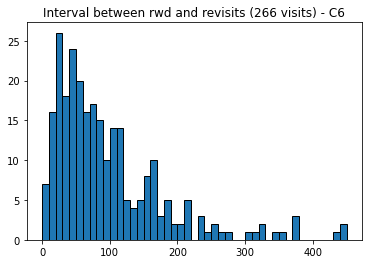

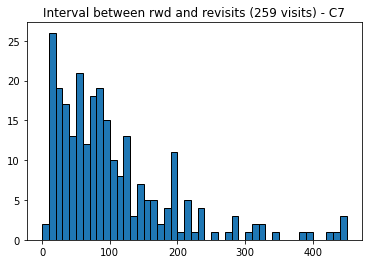

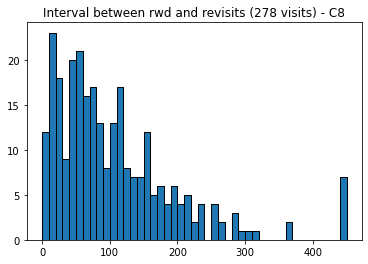

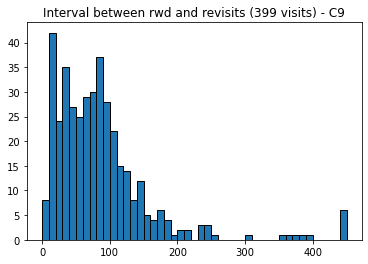

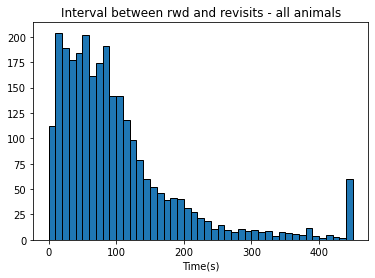

In [40]:
all_animals = []
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    
# nickname = "B2"
# tf=LoadTraj(nickname+'-tf')

    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)

    
    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    
    

    cum_times_wp_visits = []
    for wp_visits_i, wp_visits_bw_rwds in enumerate(all_waterport_visits[1:]): # disconsider waterport visits before the first reward
        cum_times_wp_visits.append(wp_visits_bw_rwds-times_to_rwd[wp_visits_i])

    plt.figure()
#     plt.title("Interval between rwd and revisits - %s" % nickname)
    plt.title("Interval between rwd and revisits (%d visits) - %s" % (len(np.concatenate(cum_times_wp_visits)),nickname))
    plt.hist(clip(concatenate(cum_times_wp_visits), 0, 450), bins=arange(0,460, 10), ec='black')
#     plt.hist(np.concatenate(cum_times_wp_visits), bins=arange(0,250, 10), ec='black')
    
    all_animals.append(np.concatenate(cum_times_wp_visits))

## FOR ALL ANIMALS
plt.figure()
plt.hist(clip(concatenate(all_animals), 0, 450), bins=arange(0,460, 10), ec='black')
plt.title("Interval between rwd and revisits - all animals")
plt.xlabel("Time(s)")

### First half of the night

Text(0.5, 0, 'Time(s)')

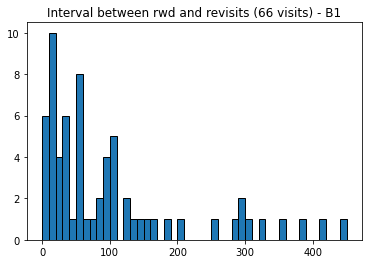

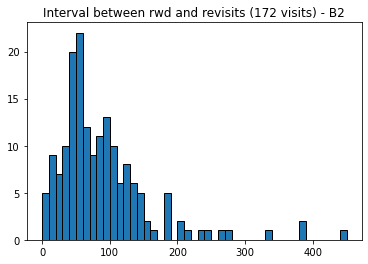

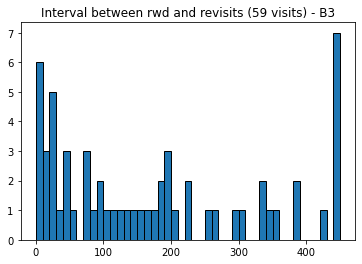

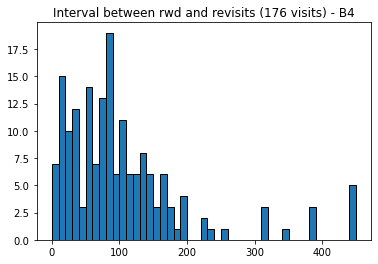

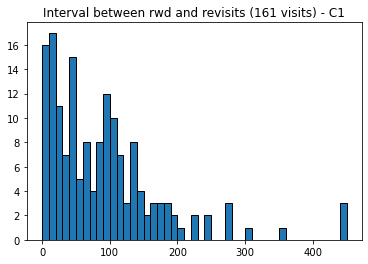

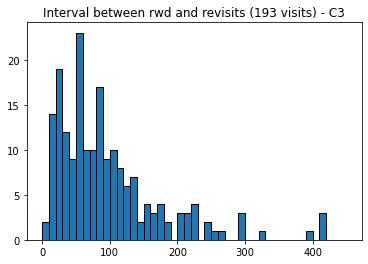

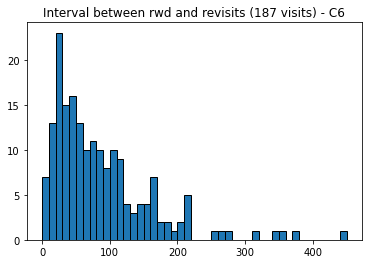

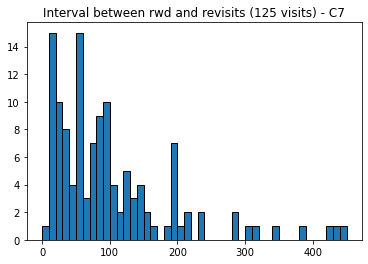

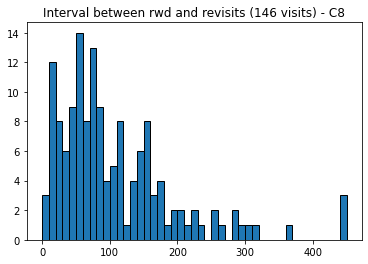

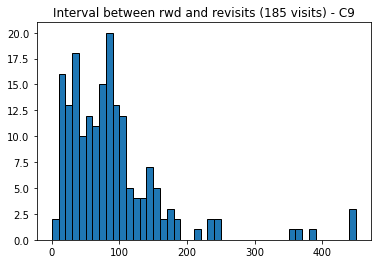

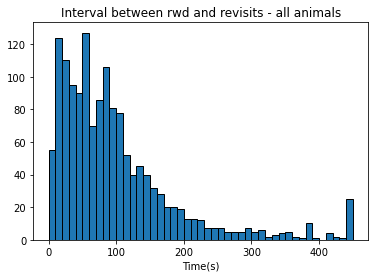

In [127]:
all_animals = []
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
# nickname = "B2"
# tf=LoadTraj(nickname+'-tf')
    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)    
    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    len(all_waterport_visits), len(times_to_rwd)
    midpoint = tf.fr[-1,-1]/FRAME_RATE/2

    rwd_idxs_1st_half = where(times_to_rwd<midpoint)[0]
    times_to_rwd_1st_half = times_to_rwd[rwd_idxs_1st_half]
#     print(len(times_to_rwd_1st_half))
    wp_idxs_1st_half = rwd_idxs_1st_half + 1  # + 1 because we want to analyse visits to waterport after each reward (and the first list is before the first list of visits is before the first rwd)
    wp_visits_1st_half = all_waterport_visits[wp_idxs_1st_half.min():wp_idxs_1st_half.max()+1]
#     print(len(wp_visits_1st_half))

    cum_times_wp_visits = []
    for wp_visits_i, wp_visits_bw_rwds in enumerate(wp_visits_1st_half):
    #     print(wp_visits_i, len(wp_visits_1st_half), len(times_to_rwd_1st_half))
        cum_times_wp_visits.append(wp_visits_bw_rwds-times_to_rwd_1st_half[wp_visits_i])

    plt.figure()
    plt.hist(clip(concatenate(cum_times_wp_visits), 0, 450), bins=arange(0,460, 10), ec='black')
    plt.title("Interval between rwd and revisits (%d visits) - %s" % (len(np.concatenate(cum_times_wp_visits)),nickname))
    
    all_animals.append(np.concatenate(cum_times_wp_visits))

## FOR ALL ANIMALS
plt.figure()
plt.hist(clip(concatenate(all_animals), 0, 450), bins=arange(0,460, 10), ec='black')
plt.title("Interval between rwd and revisits - all animals")
plt.xlabel("Time(s)")

check if the above is correct (the indexes)

### Second half of the night

Text(0.5, 0, 'Time(s)')

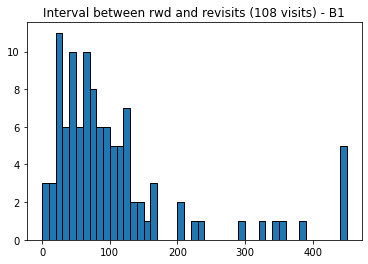

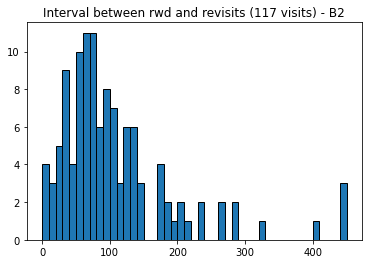

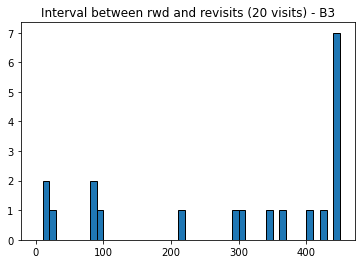

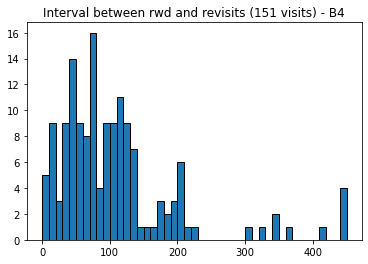

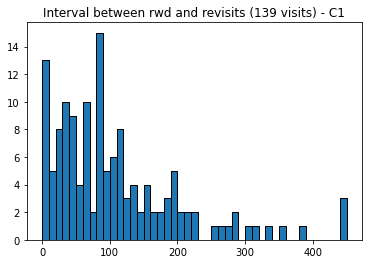

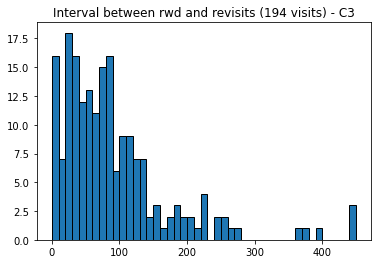

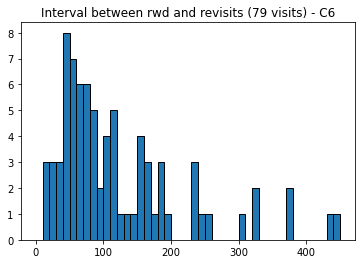

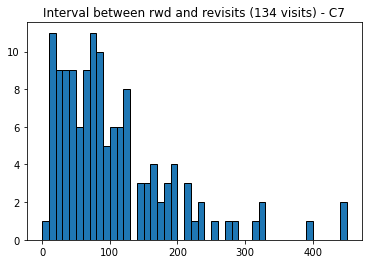

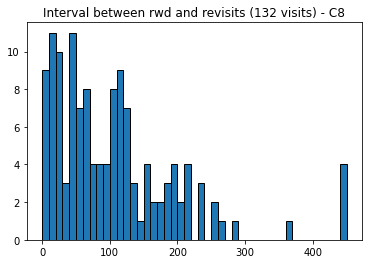

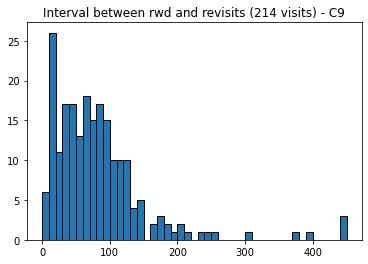

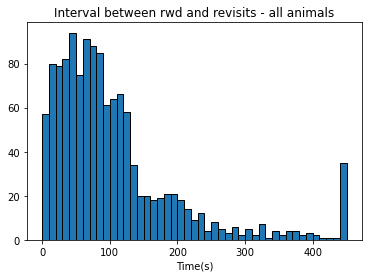

In [139]:
all_animals = []
for nickname in RewNames:
    tf=LoadTraj(nickname+'-tf')
#     nickname = "B2"
    tf=LoadTraj(nickname+'-tf')
    times_to_waterport_visits, times_to_rwd = get_wp_visit_times_and_rwd_times(tf)    
    all_waterport_visits = create_list_waterport_visits_in_between_rwds(times_to_waterport_visits, times_to_rwd)
    len(all_waterport_visits), len(times_to_rwd)
    midpoint = tf.fr[-1,-1]/FRAME_RATE/2

    rwd_idxs_2nd_half = where(times_to_rwd>=midpoint)[0]
    times_to_rwd_2nd_half = times_to_rwd[rwd_idxs_2nd_half][:-1]  # remove last rwd time because we won't analyse any wp visits after that
#     print(len(times_to_rwd_2nd_half))
    wp_idxs_2nd_half = rwd_idxs_2nd_half + 1  # + 1 because we want to analyse visits to waterport after first reward
    wp_visits_2nd_half = all_waterport_visits[wp_idxs_2nd_half.min():wp_idxs_2nd_half.max()+1]
#     print(len(wp_visits_2nd_half))
    
    cum_times_wp_visits = []
    for wp_visits_i, wp_visits_bw_rwds in enumerate(wp_visits_2nd_half):
    #     print(wp_visits_i, len(wp_visits_2nd_half), len(times_to_rwd_2nd_half))
        cum_times_wp_visits.append(wp_visits_bw_rwds-times_to_rwd_2nd_half[wp_visits_i])

    plt.figure()
    plt.hist(clip(concatenate(cum_times_wp_visits), 0, 450), bins=arange(0,460, 10), ec='black')
    plt.title("Interval between rwd and revisits (%d visits) - %s" % (len(np.concatenate(cum_times_wp_visits)),nickname))
    
    all_animals.append(np.concatenate(cum_times_wp_visits))

## FOR ALL ANIMALS
plt.figure()
plt.hist(clip(concatenate(all_animals), 0, 450), bins=arange(0,460, 10), ec='black')
plt.title("Interval between rwd and revisits - all animals")
plt.xlabel("Time(s)")

## Fit a mixture distribution to the data

In [37]:
# import scipy
from scipy import stats
from scipy.stats import rv_continuous
class mix_exp_gaussian_cdf_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _cdf(self, x, exp_scale, sigma, w):
        return w*stats.expon.cdf(x, scale=exp_scale) + (1-w) * stats.norm.cdf(x, loc=90, scale=sigma)
mix_cdf = mix_exp_gaussian_cdf_dist()

In [73]:
def grid_search(samples):
    max_e, max_s= 180, 50
    ll = zeros((max_e, max_s, 5))
    for i_w, w in enumerate([0, .25, .5, .75, 1]):
        print(w)
        for i_e, e in enumerate(range(1, max_e+1)):
            for i_s, s in enumerate(range(1, max_s+1)):
                ll[i_e, i_s, i_w] = sum(mix_cdf.logpdf(samples, exp_scale=e, sigma=s, w=w))
    return np.array(unravel_index(np.nanargmax(ll), ll.shape))+1, ll

In [74]:
params, ll = grid_search(np.concatenate(all_animals))
params, ll

0
0.25


<ipython-input-73-e1581cec909a>:8: RuntimeWarning: divide by zero encountered in log
  ll[i_e, i_s, i_w] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s, w=w)))
<ipython-input-73-e1581cec909a>:8: RuntimeWarning: invalid value encountered in log
  ll[i_e, i_s, i_w] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s, w=w)))


0.5
0.75
1


(array([117,  32,   4]),
 array([[[            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan],
         ...,
         [            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan]],
 
        [[            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan],
         [            nan,             nan,             nan,
                      nan,             nan],
    

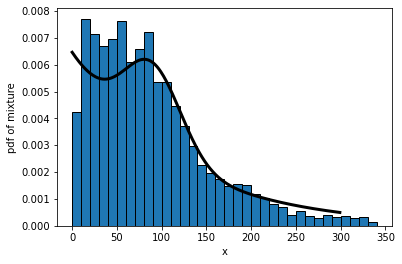

In [41]:
plt.plot(mix_cdf.pdf(np.arange(0.1, 300, 1), 117,  32,   .75), color='k', linewidth=3)
ylabel('pdf of mixture')
xlabel('x')

plt.hist(np.concatenate(all_animals), bins=arange(0,350, 10), ec='black', density=True);

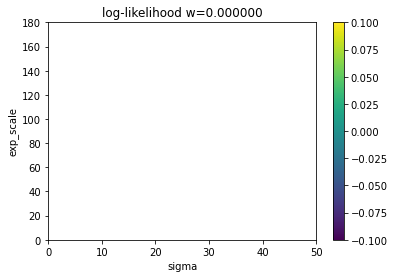

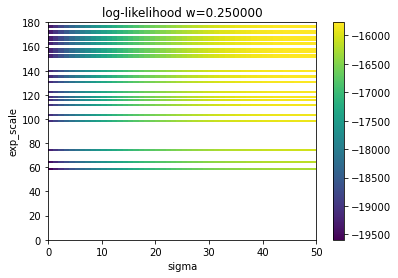

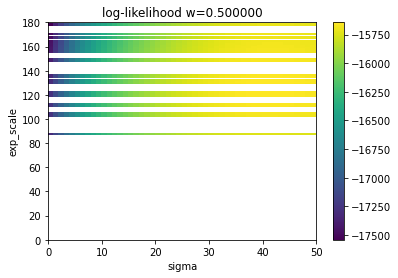

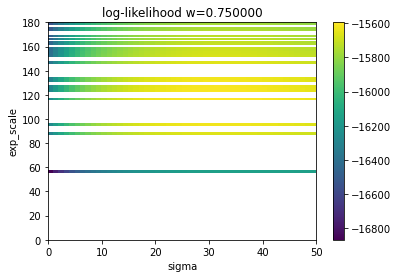

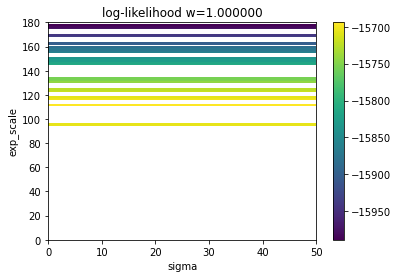

In [77]:
ws = [0, .25, .5, .75, 1]

for i in range(5):
    figure()
    pcolormesh(ll[:,:, i])
    title('log-likelihood w=%f' % ws[i])
    ylabel('exp_scale')
    xlabel('sigma')
    colorbar()

In [32]:
ll.shape

(40, 80)

In [26]:
grid_search(np.concatenate(all_animals))

<ipython-input-25-ca3727f5c201>:6: RuntimeWarning: divide by zero encountered in log
  ll[i_e, i_s] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s)))
<ipython-input-25-ca3727f5c201>:6: RuntimeWarning: invalid value encountered in log
  ll[i_e, i_s] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s)))


ValueError: All-NaN slice encountered

### Null model

Create synthetic data of a Poisson process of waterport visits. Assume that in the first visit after every 90s, the animal gets a reward. Create histograms similar to the ones above.

In [90]:
np.set_printoptions(precision=1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380]),
 <BarContainer object of 38 artists>)

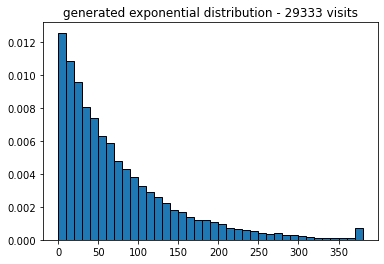

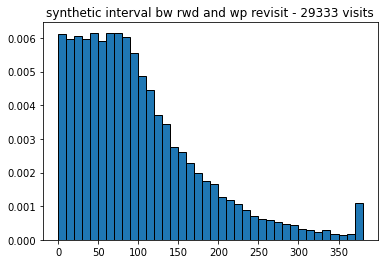

In [134]:
max_clip = 380

mean_ivi = 75  # mean inter-visit interval
total_time = 2200000  # total time in the maze ranges between 20000 and 25000 seconds
n_samples = int(total_time/mean_ivi)
synt_exp_visit_intervals = np.random.exponential(mean_ivi, n_samples)
plt.title("generated exponential distribution - %d visits" % len(synt_exp_visit_intervals))
plt.hist(clip(synt_exp_visit_intervals, 0, max_clip), bins=arange(0,max_clip+1, 10), ec='black', density=True)
# plt.ylim(0,50)



cumulated_intervals = cumsum(synt_exp_visit_intervals)
synt_wp_visit_intervals = zeros(len(cumulated_intervals))

# Reset cumulated count after 90s, as in waterport visits after rwd 90s timeout

# print(cumulated_intervals)
ref = cumulated_intervals
for idx in range(len(cumulated_intervals)):
    synt_wp_visit_intervals[idx] = ref[idx]
    if ref[idx]>=90:
        ref[idx+1:] = ref[idx+1:]-ref[idx]  # change all values of positions greater than idx+1
synt_wp_visit_intervals=ref
# print(synt_wp_visit_intervals)

plt.figure()
plt.title("synthetic interval bw rwd and wp revisit - %d visits" % len(synt_wp_visit_intervals))
plt.hist(clip(synt_wp_visit_intervals, 0, max_clip), bins=arange(0, max_clip+1, 10), ec='black', density=True)
# plt.ylim(0,50)

## time spent at home

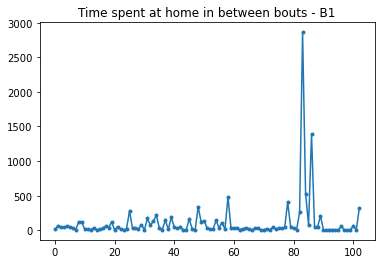

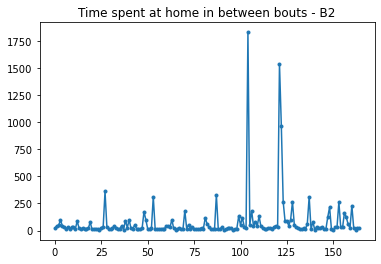

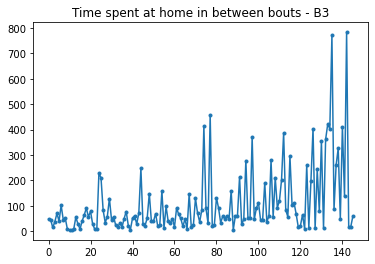

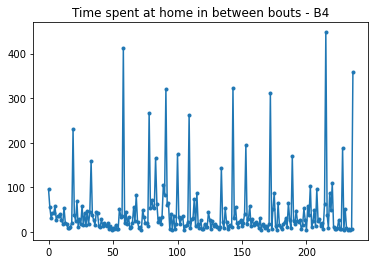

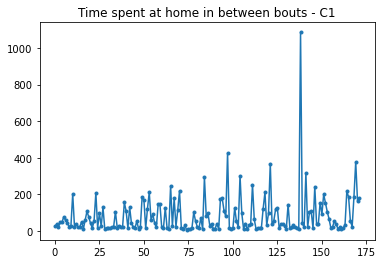

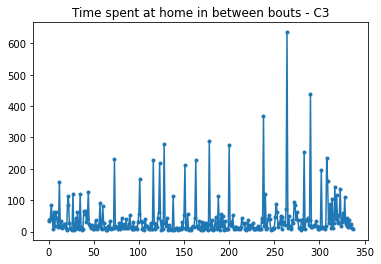

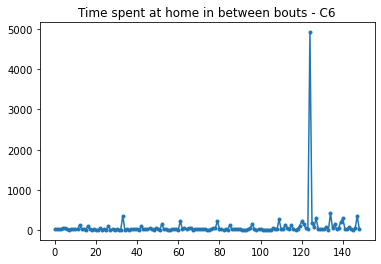

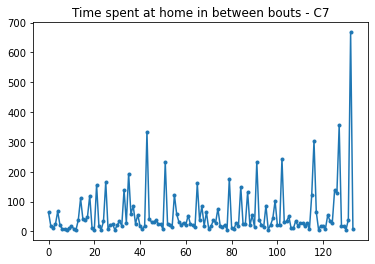

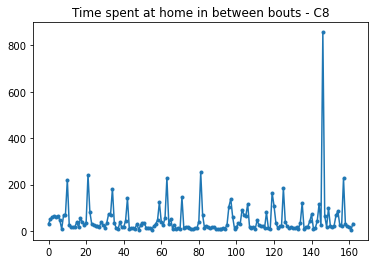

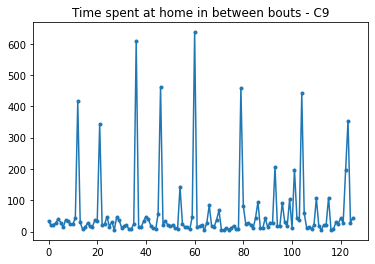

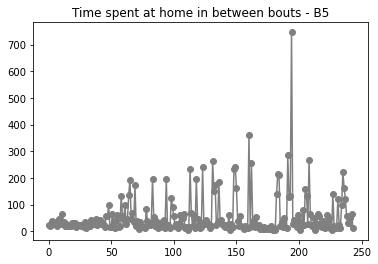

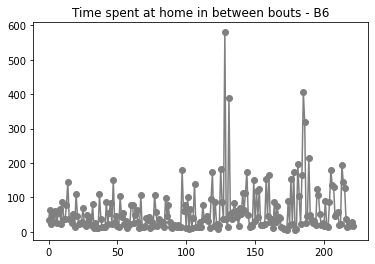

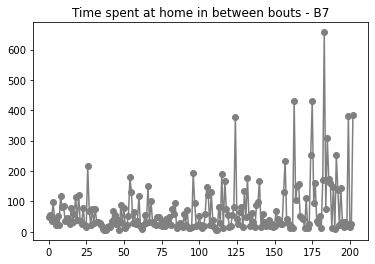

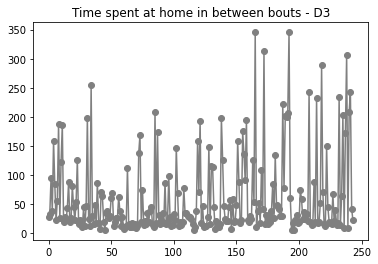

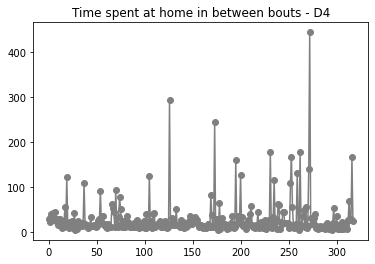

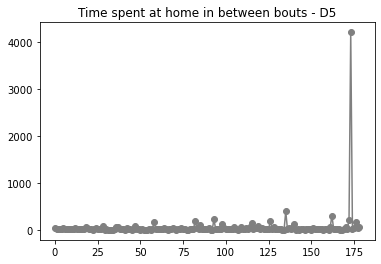

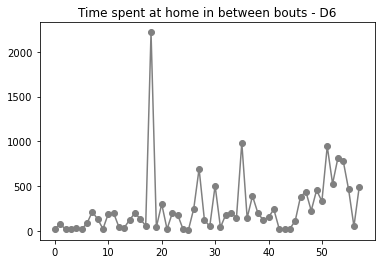

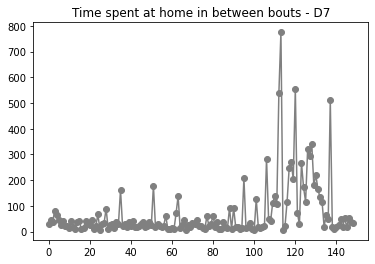

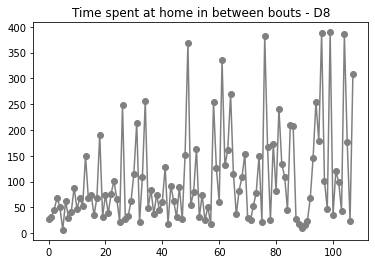

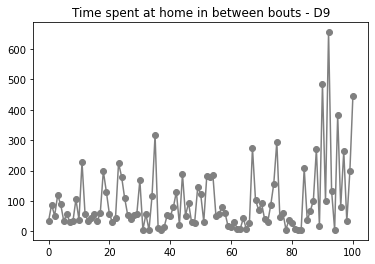

In [37]:
end_i=1
start_i=0

for nickname in RewNames:
    tf = LoadTraj(nickname+"-tf")
    plt.figure()
    plt.title("Time spent at home in between bouts - %s" % nickname)
    plt.plot([(tf.fr[bout+1][start_i]-tf.fr[bout][end_i])/FRAME_RATE for bout in range(len(tf.fr)-1)], '.-')
    
for nickname in UnrewNames:
    tf = LoadTraj(nickname+"-tf")
    plt.figure()
    plt.title("Time spent at home in between bouts - %s" % nickname)
    plt.plot([(tf.fr[bout+1][start_i]-tf.fr[bout][end_i])/FRAME_RATE for bout in range(len(tf.fr)-1)], 'gray', ls='-', marker='o')